<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/basic/14_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#오차역전파
####-Backpropagation
####-순전파

오차역 전파 -순전파
1.   신경망을 통과해서도달한 결과값은 오차(Error)를 포함한다.
2.   최종적으로 나온 오차는 여러 계산 과정들을 거치며 합산딘 값이다.
3.   각 계산 과정마다 어느 정도의 오차가 발생했는지를 관찰해서 계산과정을 다시 수정해준다.
4.   즉, 오차가 많이 발생되게 한 요인들을 큰 폭으로 값을 변화시킨다.
5.   수치미분 대신 오차역전파 사용으로 효율을 좋게한다.




계산 그래프를 사용하는가 



1.   국소적 계산 가능 

    a. 전체가 복잡해도 노드의 단순 계산의 집중

    b. 문제의 단순화
2.   중간계산결과 보관
3.   미분의 효율적 계산



##Ex)
$$ y=f(x),    y=2x $$
$$ f'(x)=2 $$

-순전파 
$$ x---> f ---> y$$

1>f>2

-오차역전파(Chain Rule)
$$E{\partial y \over \partial x} <--- f <--- E $$

1< f < 2

#합성 함수 

$$ z=(x+y)^2 >>> {\partial z \over \partial x}={\partial z \over \partial t}{\partial t \over \partial x}$$


$$ z= t^2 >>> {\partial z \over \partial t}=2t $$


$$t= x+y >>> {\partial t \over \partial x}=1 $$

$$ z=(x+y)^2 >>> {\partial z \over \partial x}=2t =2(x+y) $$



#덧셈 노드의 역전파

$$ z=x+y $$

$$ {{\partial L}\over ∂z} $$

10>>>1.3>>>>>

             +>>>>1.3>>>>  15

5>>>>1.3>>>>>



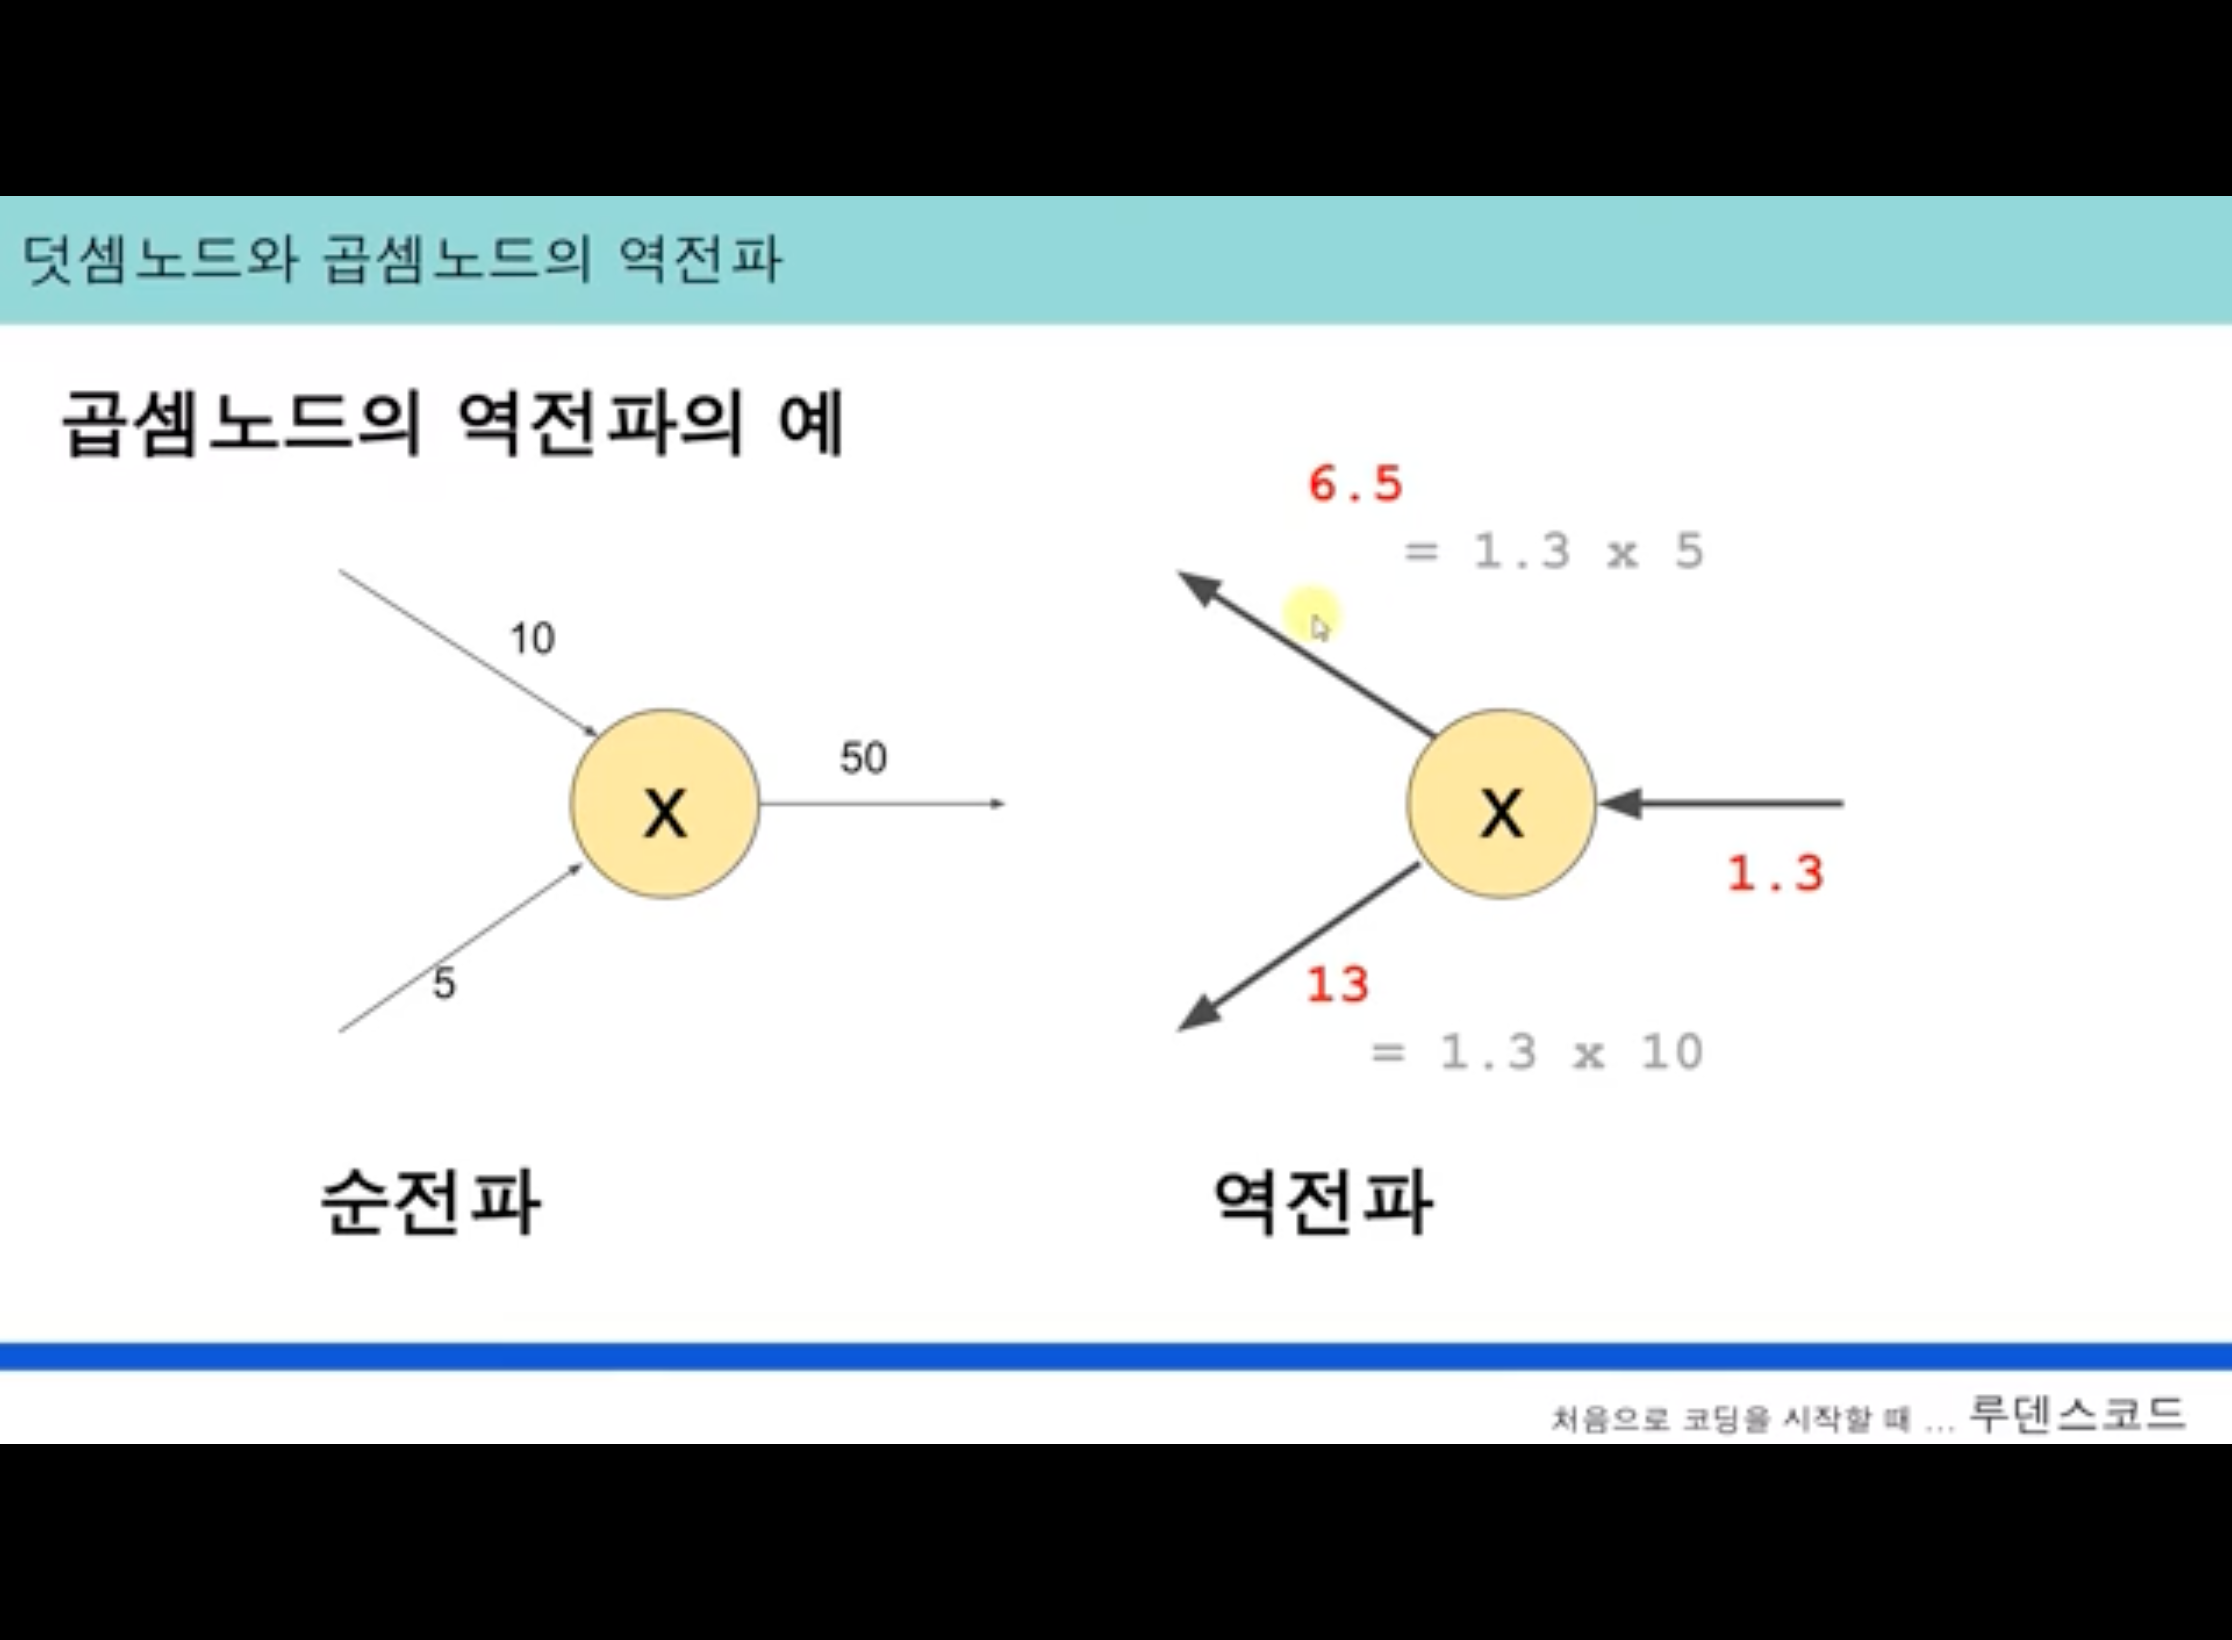

#forward()dhk backword() 구현

forward:순전파

backword:역전파



In [56]:
class MulLayer:
  def __init__(self):
    self.x=None
    self.y=None

  def forword(self, x,y):
    self.x=x
    self.y=y

    return x*y

  def backword(self,dout):
    dx=dout*self.y
    dy=dout*self.x
    return dx,dy

    

In [57]:
apple=100
apple_num=2
tax=1.1
mul_apple_layer=MulLayer()
mul_tax_layer=MulLayer()

apple_price=mul_apple_layer.forword(apple,apple_num)
price=mul_tax_layer.forword(apple_price,tax)
print(price)

220.00000000000003


In [58]:
dprice=1
dapple_price,dtax=mul_tax_layer.backword(dprice)
dapple,dapple_num=mul_apple_layer.backword(dapple_price)
print(dapple, dapple_num,dtax )


2.2 110.00000000000001 200


In [59]:
#덧셈 계층 구현
class AddLayer:
  def __init__(self):
    pass
  def forword(self,x,y):
    self.x=x
    self.y=y
    return self.x+self.y

  def backword(self,dout):
    dx=dout*1
    dy=dout*1
    return dx,dy

In [62]:
apple=100
apple_num=2
orange=150
orange_num=3
tax=1.1

Mul_apple_Layer=MulLayer()
Mul_orange_Layer=MulLayer()
Mul_tax_Layer=MulLayer()
Add_tot_Later=AddLayer()

#순전파
mul_apple_price=Mul_apple_Layer.forword(apple,apple_num) #사과 가격
mul_orange_price=Mul_orange_Layer.forword(orange,orange_num) #오렌지 가격

tot_price=Add_tot_Later.forword(mul_apple_price,mul_orange_price) #토탈 가격

price=Mul_tax_Layer.forword(tot_price,tax) #세금 추가 가격
print(price)

715.0000000000001


In [76]:
#역전파
dout=1
dtotprice,dtax=Mul_tax_Layer.backword(dout) #총 가격, 세금의 값
dapple_price,dorange_price=Add_tot_Later.backword(dtotprice) #합연산의 역전파\ 사과의 가격, 오렌지 가격
dapple,dapple_num=Mul_apple_Layer.backword(dapple_price) #사과가격 , 사과 개수
dorange,dorange_num=Mul_orange_Layer.backword(dorange_price)  #오랜지 가격, 오랜지 개수

print('\ndapple price:',dapple_price,'\ndapple:', dapple,'\ndapple num:', dapple_num)
print('\ndorange price:',dorange_price,'\ndorange:', dorange,'\ndorange num:', dorange_num)
print('\ndtax:',dtax)


dapple price: 1.1 
dapple: 2.2 
dapple num: 110.00000000000001

dorange price: 1.1 
dorange: 3.3000000000000003 
dorange num: 165.0

dtax: 650


#결과값 해석
###역전파의 의미 해석

 순전파는 실생활의 계산을 그대로 반영

 역전파는 하나하나에 대한 비중이 얼마나 되는지를 알기위해 사용 되는 것
 일종의 미분으로 작용

 아주 작은 변화가 일어났을떄 다른 어떠한 것에 어떠한 영향을 미치는가? 에 대한 것
 사과의 개수가 110인 것은 사과가 2개에서 3개로 변하면(다른 조건 동일) 300원이 되고 750원이 되고 825원이 총 가격이 된다 715에서 825로 바뀐다. 이것을 보면 110만큼 바뀌게 된다.


역전파로 인해 변하는 요소에 따라서 얼마나 최종값이 바뀌는지에 대해 볼 수 있다.